## Credit Card Engagement and Share of Wallet Analysis

## EDA analysis on Competitors data , Customer Data , Transactional Data


## There will be no null values or outliers in the data as its a dummy data created by me , this EDA process is just to show the process of EDA using Python

In [13]:
import pandas as pd 

customer_demographics = pd.read_csv('customer_demographics.csv')

In [14]:
customer_demographics.head()

,Customer ID,Age,Gender,Income Level,Location,Education Level
0,1,61,Female,High,"Los Angeles, CA",Undergraduate
1,2,44,Male,High,"Houston, TX",Graduate
2,3,43,Male,Low,"Miami, FL",High School
3,4,26,Other,Medium,"Los Angeles, CA",Graduate
4,5,47,Male,High,"Los Angeles, CA",Undergraduate


In [15]:
customer_demographics.isna()  # checking for any null values

,Customer ID,Age,Gender,Income Level,Location,Education Level
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
4995,False,False,False,False,False,False
4996,False,False,False,False,False,False
4997,False,False,False,False,False,False
4998,False,False,False,False,False,False


In [16]:
customer_demographics.duplicated() # checking  for duplicates  in  the data

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [17]:
customer_demographics.describe()

,Customer ID,Age
count,5000.000000,5000.00000
mean,2500.500000,48.52620
std,1443.520003,17.75386
min,1.000000,18.00000
25%,1250.750000,33.00000
50%,2500.500000,48.00000
75%,3750.250000,64.00000
max,5000.000000,79.00000


In [18]:
customer_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Customer ID      5000 non-null   int64 
 1   Age              5000 non-null   int64 
 2   Gender           5000 non-null   object
 3   Income Level     5000 non-null   object
 4   Location         5000 non-null   object
 5   Education Level  5000 non-null   object
dtypes: int64(2), object(4)
memory usage: 234.5+ KB


In [19]:
customer_demographics['Customer ID'].nunique() 

5000

In [21]:
# we can check for outliers in numerical values of the data

# we can use IQR method to check for outliers

Q1 = customer_demographics['Age'].quantile(0.25)
Q3 = customer_demographics['Age'].quantile(0.75)

IQR = Q3-Q1

outliers = customer_demographics[(customer_demographics['Age'] < Q1 - 1.5 * IQR) | (customer_demographics['Age'] > Q3 + 1.5 * IQR)]
print(outliers)

Empty DataFrame
Columns: [Customer ID, Age, Gender, Income Level, Location, Education Level]
Index: []


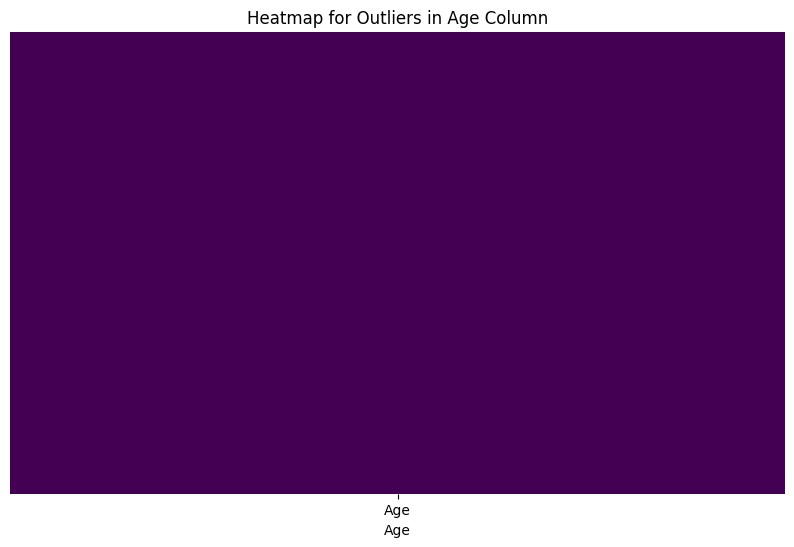

In [25]:
# heatmap to check for outliers 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


plt.figure(figsize=(10, 6))
sns.heatmap(customer_demographics[['Age']].apply(lambda x: np.abs(x - x.mean()) / x.std() > 3, axis=0), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Heatmap for Outliers in Age Column')
plt.xlabel('Age')
plt.show()



In [26]:
transactional_data = pd.read_csv('transactional_data.csv')

In [27]:
transactional_data.head()

,Transaction ID,Customer ID,Transaction Date,Amount Spent,Merchant Category,Reward Points Earned
0,1,1203,2024-01-01 00:00:00,311.53,Groceries,31
1,2,3001,2024-01-01 01:00:00,97.29,Entertainment,10
2,3,4058,2024-01-01 02:00:00,412.48,Retail,41
3,4,4750,2024-01-01 03:00:00,84.00,Travel,8
4,5,4792,2024-01-01 04:00:00,383.75,Entertainment,38


In [28]:
transactional_data.describe()

,Transaction ID,Customer ID,Amount Spent,Reward Points Earned
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,2500.933780,252.239930,25.227700
std,14433.901067,1447.481712,142.784623,14.278041
min,1.000000,1.000000,5.000000,0.000000
25%,12500.750000,1249.000000,128.710000,13.000000
50%,25000.500000,2495.500000,252.425000,25.000000
75%,37500.250000,3764.000000,375.602500,38.000000
max,50000.000000,5000.000000,500.000000,50.000000


In [29]:
transactional_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Transaction ID        50000 non-null  int64  
 1   Customer ID           50000 non-null  int64  
 2   Transaction Date      50000 non-null  object 
 3   Amount Spent          50000 non-null  float64
 4   Merchant Category     50000 non-null  object 
 5   Reward Points Earned  50000 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 2.3+ MB


In [30]:
competitor_data = pd.read_csv('competitor_data.csv')

In [31]:
competitor_data.head()

,Competitor Name,Market Share (%),Key Features,Customer Satisfaction Rating
0,Competitor A,24,No Annual Fees,4.8
1,Competitor B,36,No Annual Fees,4.2
2,Competitor C,28,"Better Rewards, Lower Annual Fees",4.3
3,Competitor D,28,Points for Every Purchase,4.5
4,Competitor E,37,"Better Rewards, Lower Annual Fees",4.4


In [32]:
competitor_data.describe()

,Market Share (%),Customer Satisfaction Rating
count,5.000000,5.000000
mean,30.600000,4.440000
std,5.639149,0.230217
min,24.000000,4.200000
25%,28.000000,4.300000
50%,28.000000,4.400000
75%,36.000000,4.500000
max,37.000000,4.800000


In [33]:
competitor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Competitor Name               5 non-null      object 
 1   Market Share (%)              5 non-null      int64  
 2   Key Features                  5 non-null      object 
 3   Customer Satisfaction Rating  5 non-null      float64
dtypes: float64(1), int64(1), object(2)
memory usage: 292.0+ bytes


In [34]:
competitor_data.isna()

,Competitor Name,Market Share (%),Key Features,Customer Satisfaction Rating
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
